## [Step 1] Import basic libraries

In [637]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import os

In [638]:
STUDENT_ID = "2258452509"

## [Step 2] Loading the dataset

In [639]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [640]:
df_train = pd.read_csv('drive/MyDrive/PROGRAMMING_ASSIGNMENT_4/train.csv')['price'].values
df_train = df_train.reshape(-1, 1)
df_test = pd.read_csv('drive/MyDrive/PROGRAMMING_ASSIGNMENT_4/test.csv')['price'].values
df_test = df_test.reshape(-1, 1)

In [641]:
dataset_train = np.array(df_train)
dataset_test = np.array(df_test)

In [642]:
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(209, 1)


# [Step 3] Pre process your data (no restrictions)

## Pre process your data in any way you want

In [643]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [644]:
dataset_train[:5]

array([[0.15749167],
       [0.16670528],
       [0.14431151],
       [0.14265361],
       [0.14187156]])

In [645]:
dataset_test[:5]

array([[0.70945808],
       [0.73010042],
       [0.7308744 ],
       [0.7018447 ],
       [0.6712539 ]])

### We create the X_train and Y_train from the dataset train
We take a price on a date as y_train and save the previous 50 closing prices as x_train

In [646]:
trace_back = 50
def create_dataset(df):
    x, y = [], []
    for i in range(trace_back, len(df)):
        x.append(df[i-trace_back:i, 0])
        y.append(df[i, 0])
    return np.array(x),np.array(y)

In [647]:
x_train, y_train = create_dataset(dataset_train)

In [648]:
x_test, y_test = create_dataset(dataset_test)

## [Step 4] Build your RNN model
### You are expect to change the content in the below cell and add your own cells

1. You have to design a RNN model that takes in your x_train and do prediction on x_test
2. Your model should be able to predict on x_test using model.predict(x_test)
3. Do not use any pretrained model.

## Your RNN model goes here

In [649]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [650]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [651]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [652]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [653]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [654]:
model.fit(x_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
120/120 [==============================] - 7s 14ms/step - loss: 0.0193
Epoch 2/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0082
Epoch 3/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0083
Epoch 4/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0063
Epoch 5/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0052
Epoch 6/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0051
Epoch 7/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0053
Epoch 8/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0049
Epoch 9/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0040
Epoch 10/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 11/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0039
Epoch 12/50
120/120 [==============================] - 2s 14ms/step - loss: 0.0036
Epoch 13/50
1

## [Step 5]: Predictions on X_test
DO NOT change the below code

In [655]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [656]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

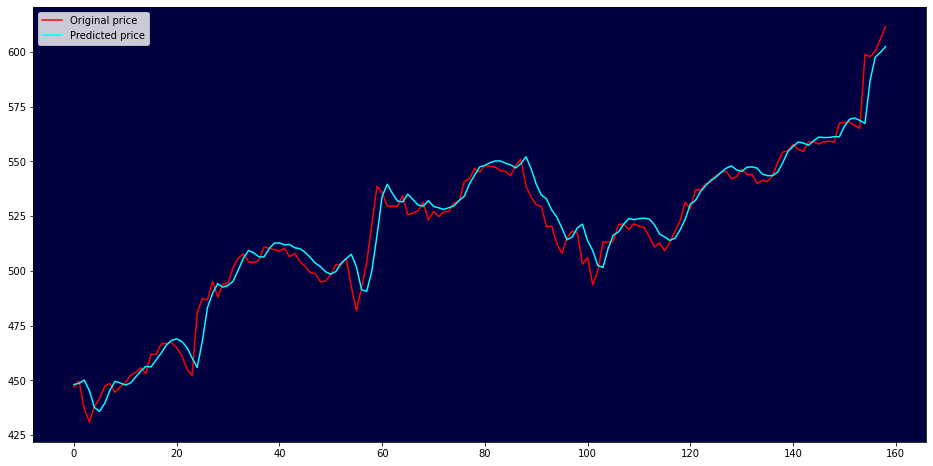

In [657]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

## [Step 6]: Checking the Root Mean Square Error on X_test

In [658]:
rmse_score = mean_squared_error([x[0] for x in y_test_scaled], [x[0] for x in predictions], squared=False)
print("RMSE",STUDENT_ID,":",rmse_score)

RMSE 2258452509 : 7.2509490761587445
